Will Davis - IA651 Applied Machine Learning - Final Project - Summer 2024

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.pipeline import make_pipeline

In [33]:

df = pd.read_csv("NFLCombineData.csv")
# Removing any rows with missing dependent variable.
df = df.dropna(subset=['round'])
df['heightinchestotal'] = df['heightinchestotal'].replace(0, np.nan)
df['weight'] = df['weight'].replace(0, np.nan)
df['arms'] = df['arms'].replace(0, np.nan)
df['hands'] = df['hands'].replace(0, np.nan)
df['fortyyd'] = df['fortyyd'].replace(0, np.nan)
df['twentyyd'] = df['twentyyd'].replace(0, np.nan)
df['tenyd'] = df['tenyd'].replace(0, np.nan)
df['twentyss'] = df['twentyss'].replace(0, np.nan)
df['threecone'] = df['threecone'].replace(0, np.nan)
df['vertical'] = df['vertical'].replace(0, np.nan)
df['broad'] = df['broad'].replace(0, np.nan)
df['bench'] = df['bench'].replace(0, np.nan)
df = df[(df['round'] > 0) & (df['round'] < 8)]
df = df.reset_index(drop=True)
print(df.head(10))

# Remove rows with zeros and see how many rows are left. Maybe imputation.
# Try for regression 

   year               name firstname    lastname position heightfeet  \
0  2014   Jared Abbrederis     Jared  Abbrederis       WR          6   
1  2014      Davante Adams   Davante       Adams       WR          6   
2  2014       Mo Alexander        Mo   Alexander       SS          6   
3  2014      Ricardo Allen   Ricardo       Allen       CB          5   
4  2014         Jace Amaro      Jace       Amaro       TE          6   
5  2014         Dri Archer       Dri      Archer       RB          5   
6  2014  Jeremiah Attaochu  Jeremiah    Attaochu      OLB          6   
7  2014       Anthony Barr   Anthony        Barr      OLB          6   
8  2014       Lamin Barrow     Lamin      Barrow      OLB          6   
9  2014      Odell Beckham     Odell     Beckham       WR          5   

  heightinches  heightinchestotal  weight  arms  ...  bench  round  \
0            1               73.0     195   NaN  ...    4.0      6   
1            1               73.0     212   NaN  ...   14.0      2 

In [34]:
print(df.columns)
print(df.shape)

Index(['year', 'name', 'firstname', 'lastname', 'position', 'heightfeet',
       'heightinches', 'heightinchestotal', 'weight', 'arms', 'hands',
       'fortyyd', 'twentyyd', 'tenyd', 'twentyss', 'threecone', 'vertical',
       'broad', 'bench', 'round', 'college', 'pick', 'pickround', 'picktotal',
       'wonderlic', 'nflgrade', 'Unnamed: 26', 'Unnamed: 27'],
      dtype='object')
(3026, 28)


The predicted variable here is going to be 'round', in other words, can I predict which round the player will be drafted in based on the other variables in the data set.

In [35]:
# I have chosen these predictor variables as they are not related to any other previous analysis and are not related to draft positioning as that is what we are trying to predict.

X = df[['position','heightinchestotal', 'weight', 'arms', 'hands','fortyyd', 'twentyss', 'threecone', 'vertical','broad', 'bench']]

# Use dummy variables for these instead, if too many columns use PCA/Bucketing (Conference, State, Region, etc.)

X = pd.get_dummies(X, columns=['position'], prefix='dummy_', dtype=int)

# Data now has 320 columns, which I going to reduce using PCA. I'd like to explain 85% of variance.
X

,heightinchestotal,weight,arms,hands,fortyyd,twentyss,threecone,vertical,broad,bench,...,dummy__OC,dummy__OG,dummy__OLB,dummy__OT,dummy__P,dummy__QB,dummy__RB,dummy__SS,dummy__TE,dummy__WR
0,73.0,195,NaN,NaN,4.50,4.08,6.80,30.5,117.0,4.0,...,0,0,0,0,0,0,0,0,0,1
1,73.0,212,NaN,NaN,4.56,4.30,6.82,39.5,123.0,14.0,...,0,0,0,0,0,0,0,0,0,1
2,73.0,220,NaN,NaN,4.54,4.51,7.05,38.0,123.0,NaN,...,0,0,0,0,0,0,0,1,0,0
3,69.0,187,NaN,NaN,4.61,4.15,NaN,35.5,117.0,13.0,...,0,0,0,0,0,0,0,0,0,0
4,77.0,265,NaN,NaN,4.74,4.30,7.42,33.0,118.0,28.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3021,78.0,303,NaN,NaN,5.13,NaN,NaN,26.5,97.0,NaN,...,0,0,0,0,0,0,0,0,0,0
3022,68.0,164,NaN,NaN,4.47,4.14,NaN,32.5,112.0,NaN,...,0,0,0,0,0,0,0,0,0,1
3023,78.0,335,NaN,NaN,5.57,NaN,NaN,NaN,NaN,20.0,...,0,0,0,1,0,0,0,0,0,0
3024,77.0,246,NaN,NaN,4.72,4.49,NaN,35.5,122.0,20.0,...,0,0,0,0,0,0,0,0,0,0


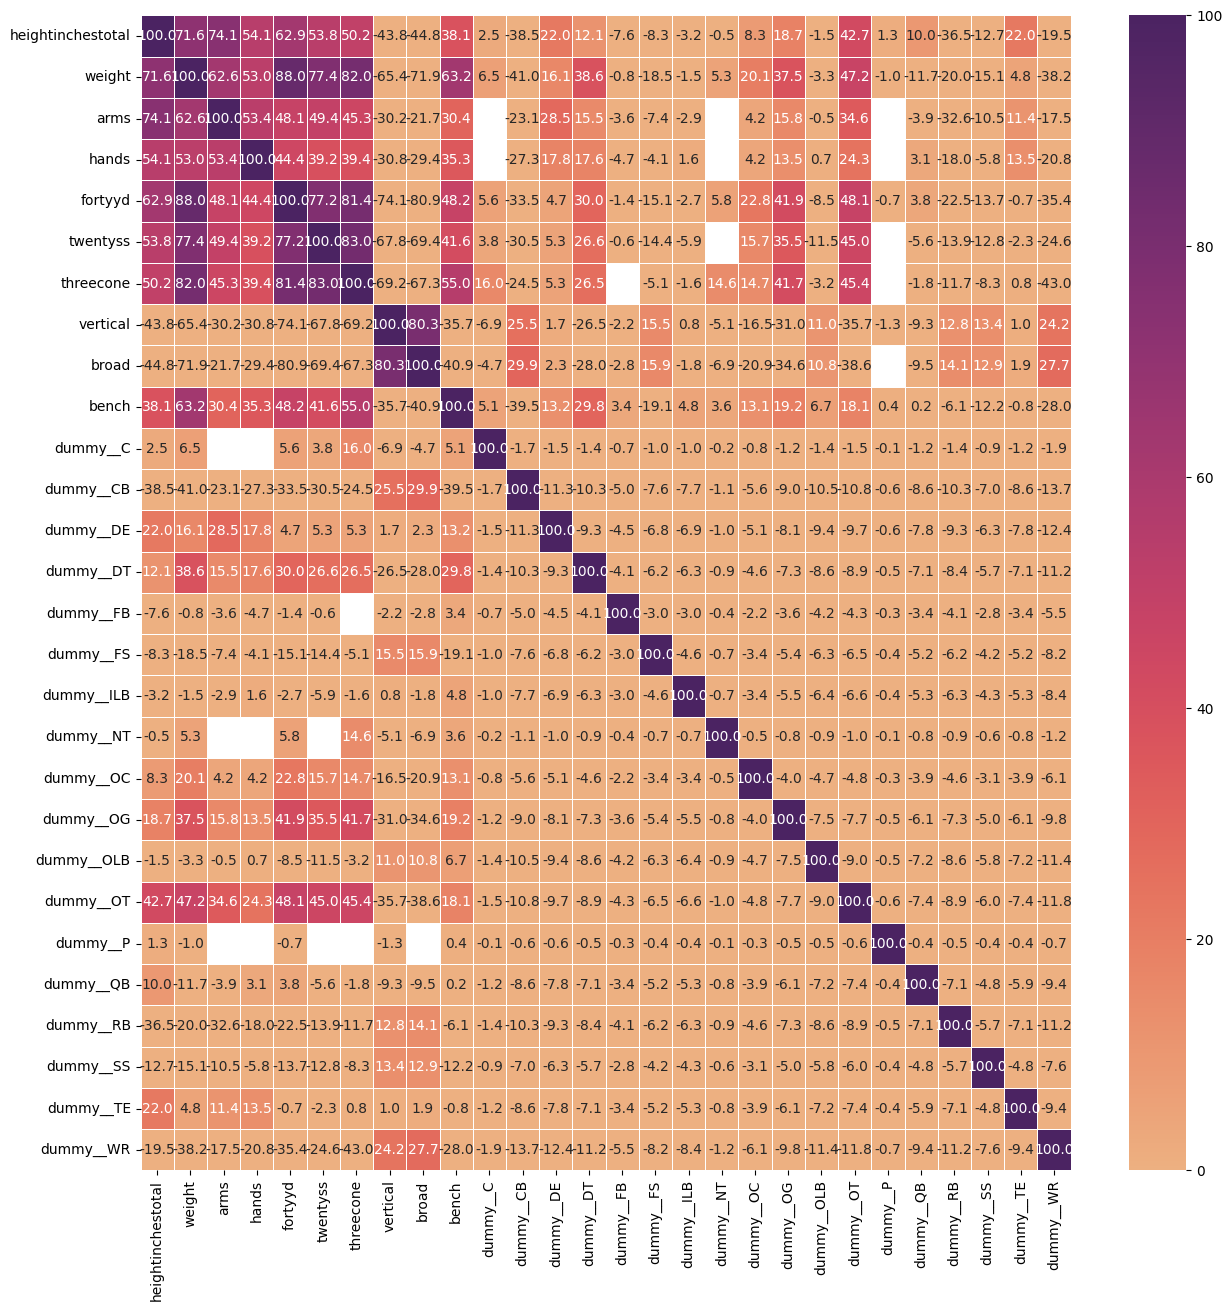

In [36]:
matrix = X.corr() * 100

plt.figure(figsize=(15,15))
sns.heatmap(matrix, annot=True, linewidth=.5, vmin=0, vmax=100,
            fmt=".1f", cmap=sns.color_palette("flare", as_cmap=True))
plt.show()

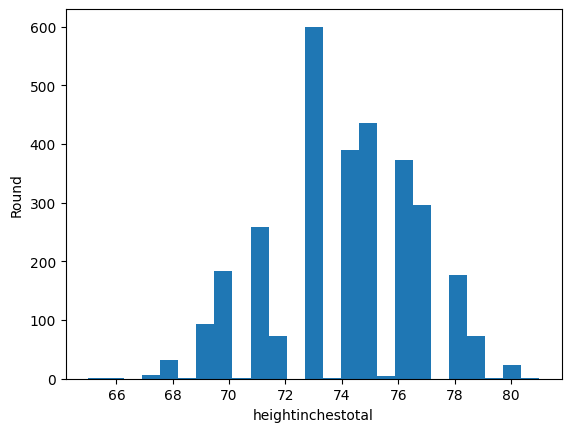

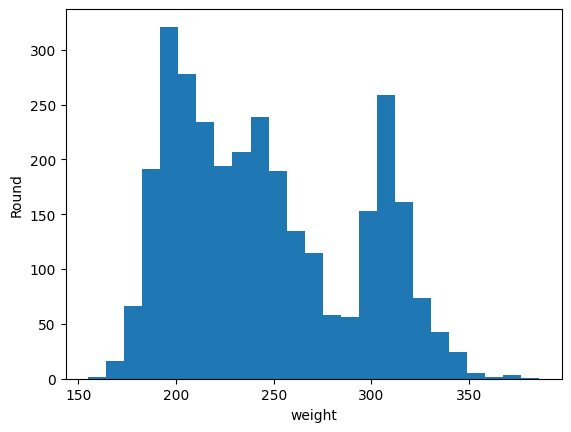

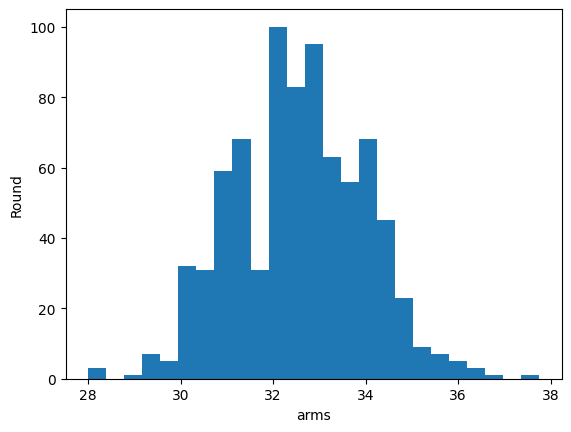

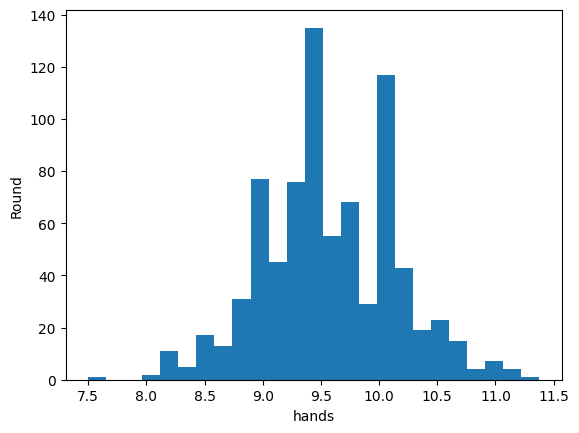

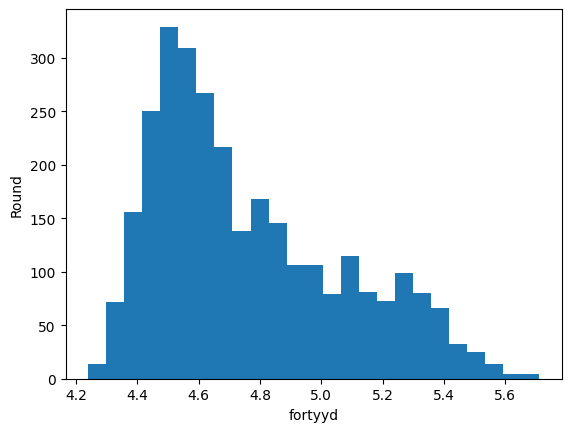

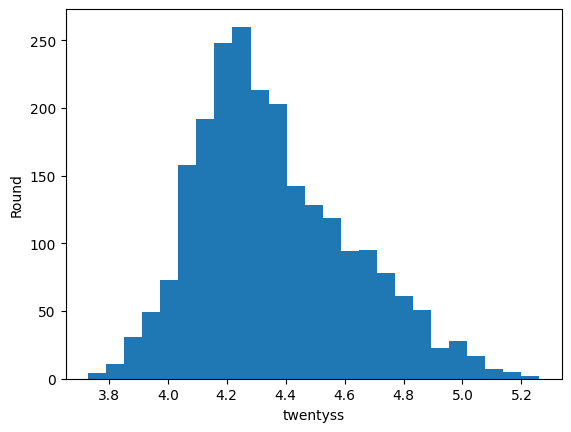

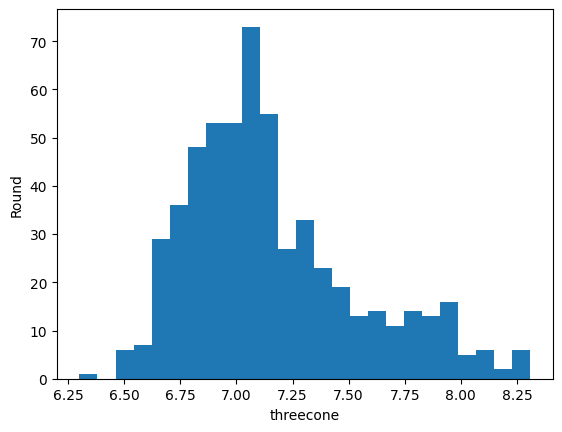

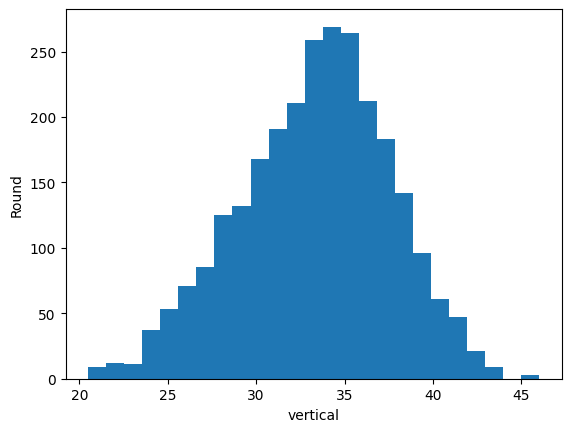

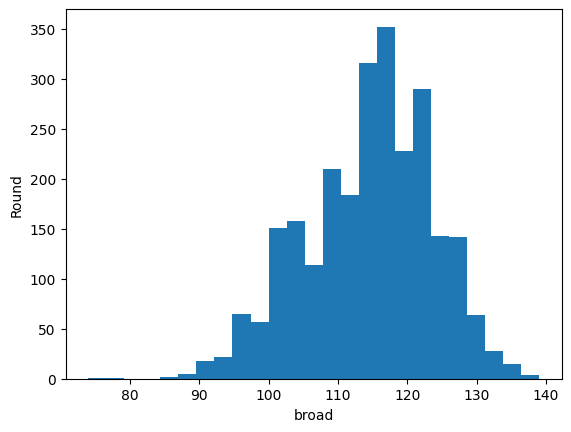

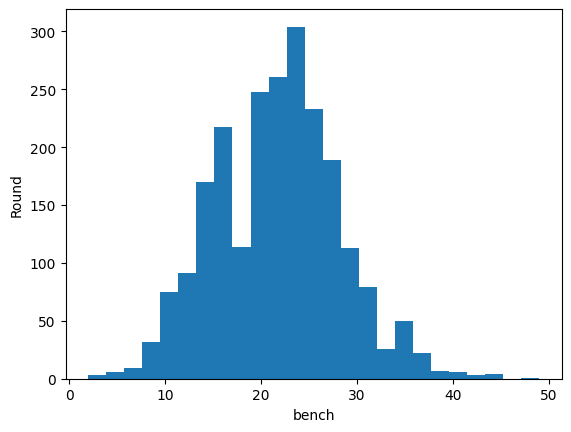

<Figure size 640x480 with 0 Axes>

In [37]:
count = 0
for col in X.columns:
    if count < 10:
        plt.hist(X[col],bins=25)
        plt.xlabel(col)
        plt.ylabel('Round')
        plt.show()
        plt.clf()
        count += 1


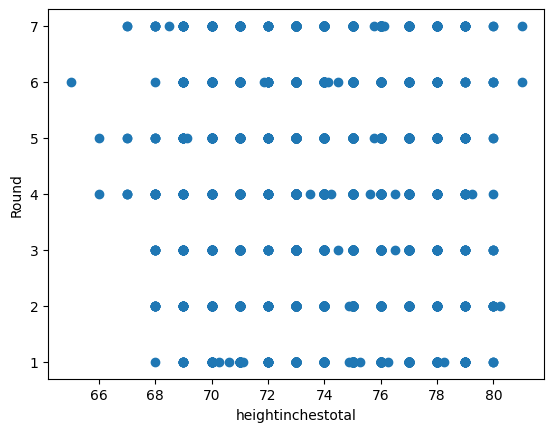

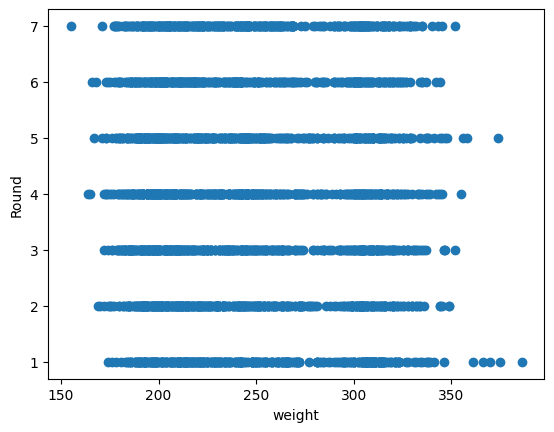

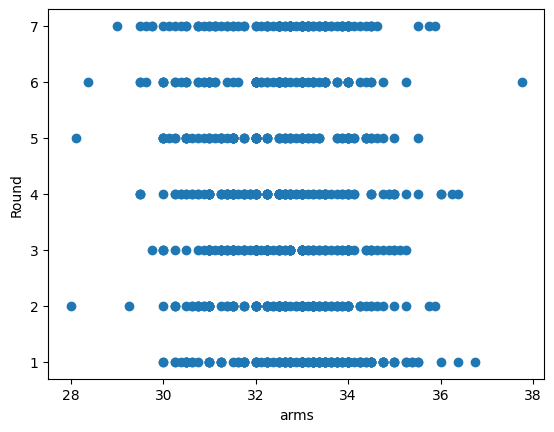

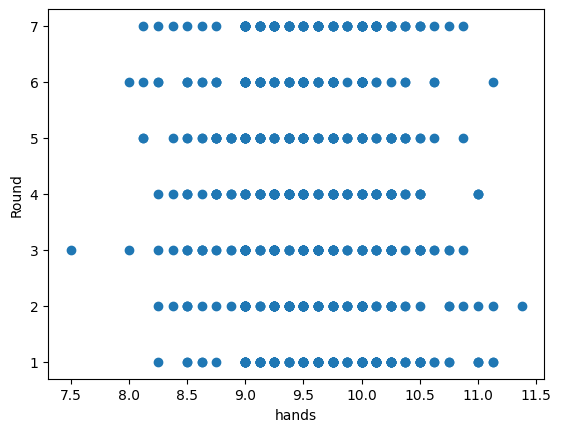

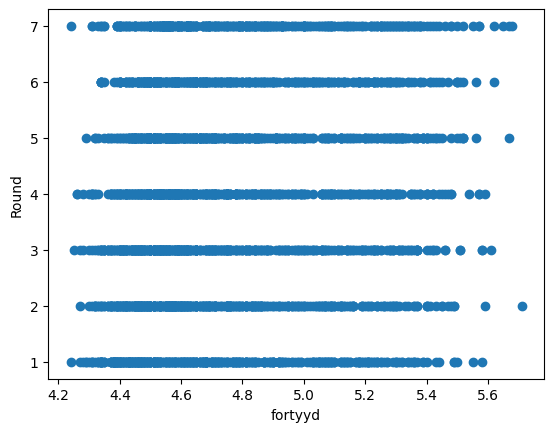

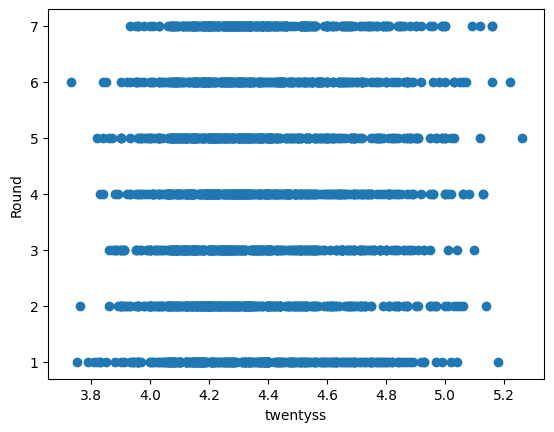

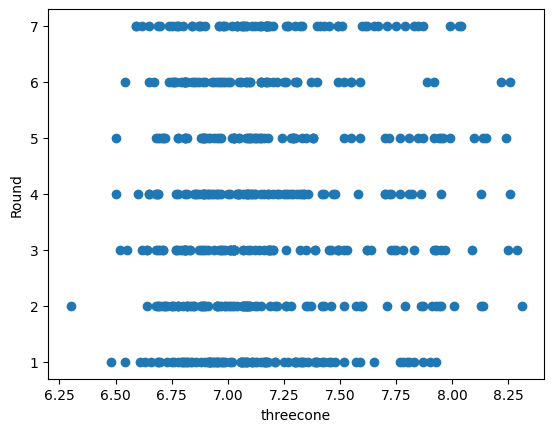

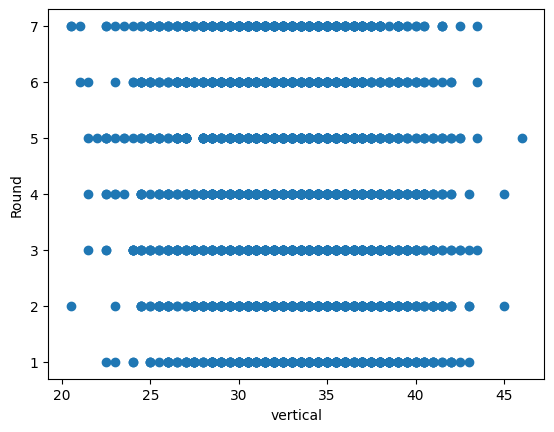

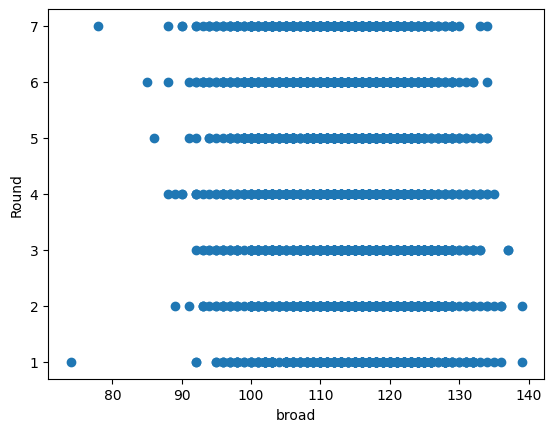

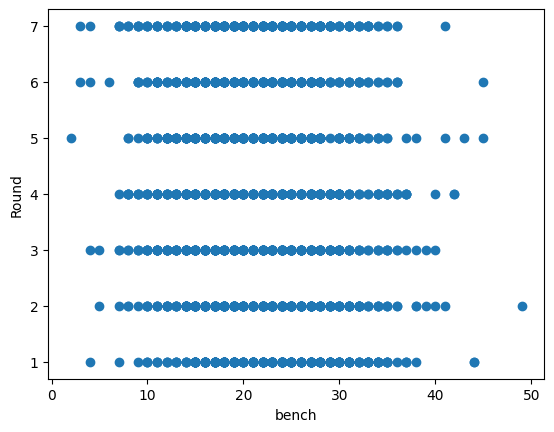

<Figure size 640x480 with 0 Axes>

In [38]:
count = 0
for col in X.columns:
    if count < 10:
        plt.scatter(X[col],df['round'])
        plt.xlabel(col)
        plt.ylabel('Round')
        plt.show()
        plt.clf()
        count += 1

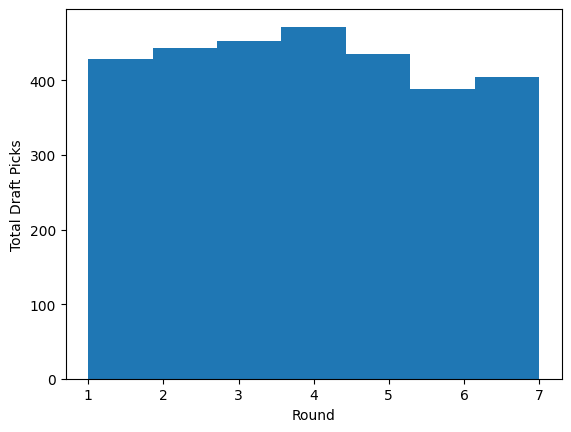

In [39]:
plt.hist(df['round'],bins=7)
plt.xlabel('Round')
plt.ylabel('Total Draft Picks')
plt.show()

In [40]:
# Scaling for PCA

PCA_model = make_pipeline(SimpleImputer(strategy='median'),StandardScaler())
PCA_df = pd.DataFrame(PCA_model.fit_transform(X), columns=X.columns)
PCA_df

,heightinchestotal,weight,arms,hands,fortyyd,twentyss,threecone,vertical,broad,bench,...,dummy__OC,dummy__OG,dummy__OLB,dummy__OT,dummy__P,dummy__QB,dummy__RB,dummy__SS,dummy__TE,dummy__WR
0,-0.425013,-1.112433,0.020767,-0.062316,-0.859782,-1.188031,-1.761629,-0.722425,0.302514,-3.187356,...,-0.158328,-0.252231,-0.295493,-0.305300,-0.018182,-0.243214,-0.290171,-0.196956,-0.243214,2.584609
1,-0.425013,-0.741153,0.020767,-0.062316,-0.661726,-0.226093,-1.642105,1.574793,1.009027,-1.396813,...,-0.158328,-0.252231,-0.295493,-0.305300,-0.018182,-0.243214,-0.290171,-0.196956,-0.243214,2.584609
2,-0.425013,-0.566433,0.020767,-0.062316,-0.727744,0.692121,-0.267585,1.191924,1.009027,0.035622,...,-0.158328,-0.252231,-0.295493,-0.305300,-0.018182,-0.243214,-0.290171,5.077279,-0.243214,-0.386906
3,-1.964490,-1.287153,0.020767,-0.062316,-0.496679,-0.881959,-0.088300,0.553807,0.302514,-1.575867,...,-0.158328,-0.252231,-0.295493,-0.305300,-0.018182,-0.243214,-0.290171,-0.196956,-0.243214,-0.386906
4,1.114464,0.416368,0.020767,-0.062316,-0.067557,-0.226093,1.943600,-0.084309,0.420266,1.109947,...,-0.158328,-0.252231,-0.295493,-0.305300,-0.018182,-0.243214,-0.290171,-0.196956,4.111609,-0.386906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3021,1.499333,1.246288,0.020767,-0.062316,1.219809,-0.138644,-0.088300,-1.743411,-2.052531,0.035622,...,-0.158328,-0.252231,-0.295493,-0.305300,-0.018182,-0.243214,-0.290171,-0.196956,-0.243214,-0.386906
3022,-2.349359,-1.789474,0.020767,-0.062316,-0.958810,-0.925684,-0.088300,-0.211932,-0.286248,0.035622,...,-0.158328,-0.252231,-0.295493,-0.305300,-0.018182,-0.243214,-0.290171,-0.196956,-0.243214,2.584609
3023,1.499333,1.945169,0.020767,-0.062316,2.672221,-0.138644,-0.088300,0.043314,0.067009,-0.322487,...,-0.158328,-0.252231,-0.295493,3.275467,-0.018182,-0.243214,-0.290171,-0.196956,-0.243214,-0.386906
3024,1.114464,0.001407,0.020767,-0.062316,-0.133576,0.604672,-0.088300,0.553807,0.891275,-0.322487,...,-0.158328,-0.252231,-0.295493,-0.305300,-0.018182,-0.243214,-0.290171,-0.196956,-0.243214,-0.386906


In [41]:
pca = PCA(n_components=0.85,random_state=42)
pca_data = pca.fit_transform(PCA_model.fit_transform(X))
pca_data

array([[-2.63709123e+00, -1.15294878e-01, -1.07317635e+00, ...,
         5.94318292e-01, -6.56430808e-02,  2.79858533e-02],
       [-2.63517614e+00,  5.52436601e-01, -6.69495831e-02, ...,
         4.99907930e-01, -8.73930424e-02, -1.24606091e-02],
       [-1.49066470e+00,  4.40254879e-01, -1.23017988e-01, ...,
        -2.77714277e-01, -1.32353273e-03,  1.62878688e-02],
       ...,
       [ 2.79465654e+00,  1.67134703e-01, -1.44423659e+00, ...,
        -6.20320665e-01,  3.19437044e-01, -8.79777037e-02],
       [ 8.74449486e-02,  1.72258793e+00,  3.87957251e-01, ...,
        -9.13700279e-01,  4.20027595e-01, -7.09901251e-02],
       [-2.14206182e+00, -1.33694052e+00,  1.26500903e+00, ...,
         1.01974428e+00, -2.45409220e-01,  8.11266701e-02]])

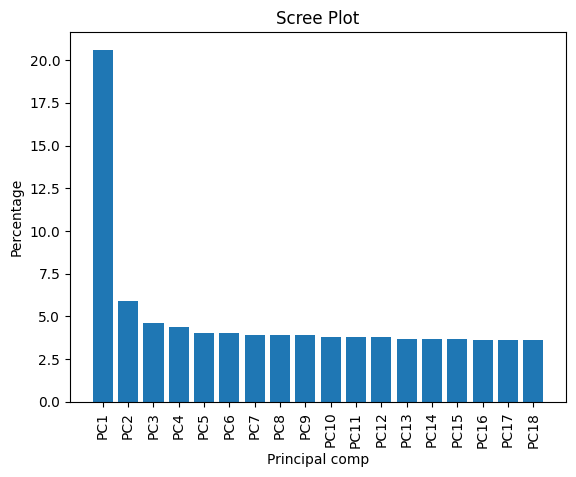

In [42]:
pca.explained_variance_ratio_

# Multiply explained by 100 and round
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
# Create labels for barplot
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]


plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)

plt.ylabel('Percentage')

plt.xlabel('Principal comp')

plt.title('Scree Plot')

plt.xticks(rotation = 90)

plt.show()

In [43]:
PCA_X = pd.DataFrame(pca_data, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])
y = df['round']

PCA_X_train, PCA_X_test, PCA_y_train, PCA_y_test = train_test_split(PCA_X, y,
                                            train_size=0.9,
                                            random_state=42) 

# Fit model
PCA_log_reg = LogisticRegression()
PCA_log_reg.fit(PCA_X_train, PCA_y_train)

LogisticRegression()

In [44]:
# This is a really bad model!

PCA_y_pred_train = PCA_log_reg.predict(PCA_X_train)
PCA_y_pred = PCA_log_reg.predict(PCA_X_test)

print(metrics.accuracy_score(PCA_y_train, PCA_y_pred_train),
    metrics.recall_score(PCA_y_train, PCA_y_pred_train,average='macro'),#macro gives what is normally the BAS, weighted gives what is the AS 
    metrics.balanced_accuracy_score(PCA_y_train, PCA_y_pred_train),
    metrics.precision_score(PCA_y_test, PCA_y_pred,average='macro'))


print(metrics.accuracy_score(PCA_y_test, PCA_y_pred),
    metrics.recall_score(PCA_y_test, PCA_y_pred,average='macro'),#macro gives what is normally the BAS, weighted gives what is the AS 
    metrics.balanced_accuracy_score(PCA_y_test, PCA_y_pred),
    metrics.precision_score(PCA_y_test, PCA_y_pred,average='macro'))

0.20969518912963642 0.20739118150551433 0.20739118150551433 0.18827199417116797
0.1782178217821782 0.17808616147058481 0.17808616147058481 0.18827199417116797


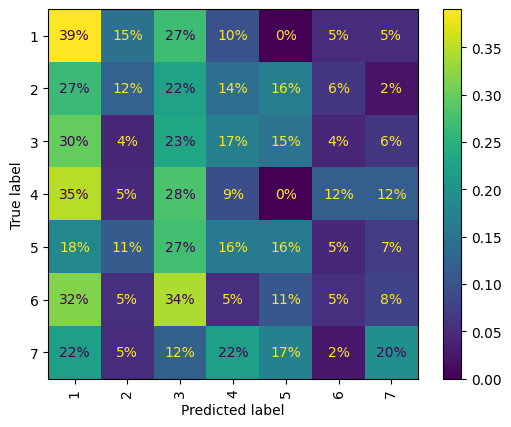

In [45]:
metrics.ConfusionMatrixDisplay.from_predictions(PCA_y_test, PCA_y_pred, normalize='true', values_format=".0%")
plt.xticks(rotation=90)
plt.show()

In [46]:
imp_X_train, imp_X_test, imp_y_train, imp_y_test = train_test_split(X, y,
                                            train_size=0.9,
                                            random_state=42)

imp_model = make_pipeline(SimpleImputer(strategy='median'),StandardScaler(),LogisticRegression())
imp_model.fit(imp_X_train, imp_y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [47]:
imp_y_pred_train = imp_model.predict(imp_X_train)
imp_y_pred = imp_model.predict(imp_X_test)

print(metrics.accuracy_score(imp_y_train, imp_y_pred_train),
    metrics.recall_score(imp_y_train, imp_y_pred_train,average='macro'),#macro gives what is normally the BAS, weighted gives what is the AS 
    metrics.balanced_accuracy_score(imp_y_train, imp_y_pred_train),
    metrics.precision_score(imp_y_test, imp_y_pred,average='macro'))


print(metrics.accuracy_score(imp_y_test, imp_y_pred),
    metrics.recall_score(imp_y_test, imp_y_pred,average='macro'),#macro gives what is normally the BAS, weighted gives what is the AS 
    metrics.balanced_accuracy_score(imp_y_test, imp_y_pred),
    metrics.precision_score(imp_y_test, imp_y_pred,average='macro'))

0.23319867792875504 0.23344723193794953 0.23344723193794953 0.17599655214994023
0.19141914191419143 0.19594592755614001 0.19594592755614001 0.17599655214994023


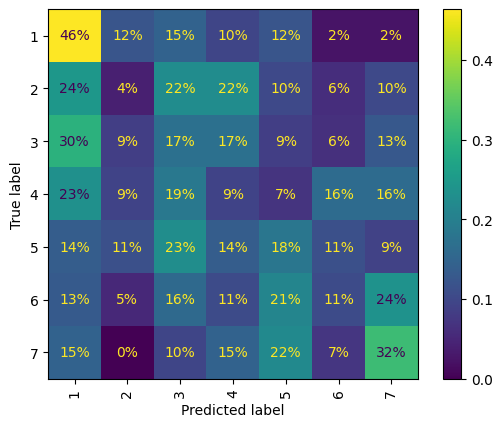

In [48]:
metrics.ConfusionMatrixDisplay.from_predictions(imp_y_test, imp_y_pred, normalize='true', values_format=".0%")
plt.xticks(rotation=90)
plt.show()

In [49]:
# Let's try an SVM appraoch

SVM_X_train, SVM_X_test, SVM_y_train, SVM_y_test = train_test_split(X,y,train_size=0.9, random_state=42)

SVM_pipe = make_pipeline(SimpleImputer(strategy='median'),StandardScaler())
SVM_X_train = SVM_pipe.fit_transform(SVM_X_train)
SVM_X_test = SVM_pipe.fit_transform(SVM_X_test)
SVM_X_df = pd.DataFrame(SVM_X_train, columns=X.columns)
folds = KFold(n_splits=4, shuffle=True, random_state=42)
params = {'C': [1,2,5,10,50,100,250,500,1000,2000,3000],
          'gamma': [1, 0.95, 0.9, 0.75, 0.5, 0.25, 0.1, 0.01]}

c_opt = GridSearchCV(estimator=SVC(), param_grid=params,
                     scoring='f1_macro', cv=folds, n_jobs=-1,
                     verbose=1, return_train_score=True)

c_opt.fit(SVM_X_df, SVM_y_train)

Fitting 4 folds for each of 88 candidates, totalling 352 fits


GridSearchCV(cv=KFold(n_splits=4, random_state=42, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 2, 5, 10, 50, 100, 250, 500, 1000, 2000,
                               3000],
                         'gamma': [1, 0.95, 0.9, 0.75, 0.5, 0.25, 0.1, 0.01]},
             return_train_score=True, scoring='f1_macro', verbose=1)

In [50]:
print(c_opt.best_params_)

{'C': 5, 'gamma': 0.1}


In [51]:
# This model is better than our logistic regression models, but I think there is an overfitting problem here.

SVM_model = SVC(gamma=0.1, C=5)
SVM_model.fit(SVM_X_train, SVM_y_train)
SVM_y_pred_train = SVM_model.predict(SVM_X_train)
SVM_y_pred = SVM_model.predict(SVM_X_test)


print(metrics.accuracy_score(SVM_y_train, SVM_y_pred_train),
      metrics.f1_score(SVM_y_train, SVM_y_pred_train, average='macro'))


print(metrics.accuracy_score(SVM_y_test, SVM_y_pred),
      metrics.f1_score(SVM_y_test, SVM_y_pred, average='macro'))

0.5717958134410577 0.5702230370366662
0.19471947194719472 0.1933584455133707


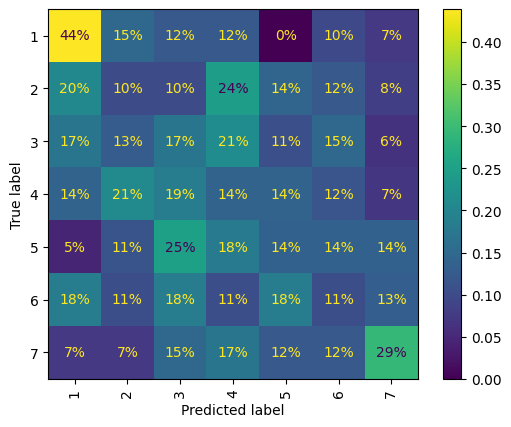

In [52]:
metrics.ConfusionMatrixDisplay.from_predictions(SVM_y_test,
                                                SVM_y_pred,
                                                xticks_rotation='vertical', normalize='true', values_format=".0%")
plt.show()

In [53]:
print(metrics.classification_report(SVM_y_test,SVM_y_pred))

              precision    recall  f1-score   support

           1       0.33      0.44      0.38        41
           2       0.13      0.10      0.11        49
           3       0.16      0.17      0.16        47
           4       0.12      0.14      0.13        43
           5       0.17      0.14      0.15        44
           6       0.11      0.11      0.11        38
           7       0.33      0.29      0.31        41

    accuracy                           0.19       303
   macro avg       0.19      0.20      0.19       303
weighted avg       0.19      0.19      0.19       303



In [104]:
df.iloc[95,:]
#X['predict'] = SVM_model.predict(SVM_pipe.fit_transform(X))
X.iloc[95,:]

heightinchestotal     72.0
weight               209.0
arms                   NaN
hands                  NaN
fortyyd                4.6
twentyss               NaN
threecone              NaN
vertical              35.5
broad                118.0
bench                 16.0
dummy__C               0.0
dummy__CB              0.0
dummy__DE              0.0
dummy__DT              0.0
dummy__FB              0.0
dummy__FS              0.0
dummy__ILB             0.0
dummy__NT              0.0
dummy__OC              0.0
dummy__OG              0.0
dummy__OLB             0.0
dummy__OT              0.0
dummy__P               0.0
dummy__QB              0.0
dummy__RB              1.0
dummy__SS              0.0
dummy__TE              0.0
dummy__WR              0.0
predict                3.0
Name: 95, dtype: float64

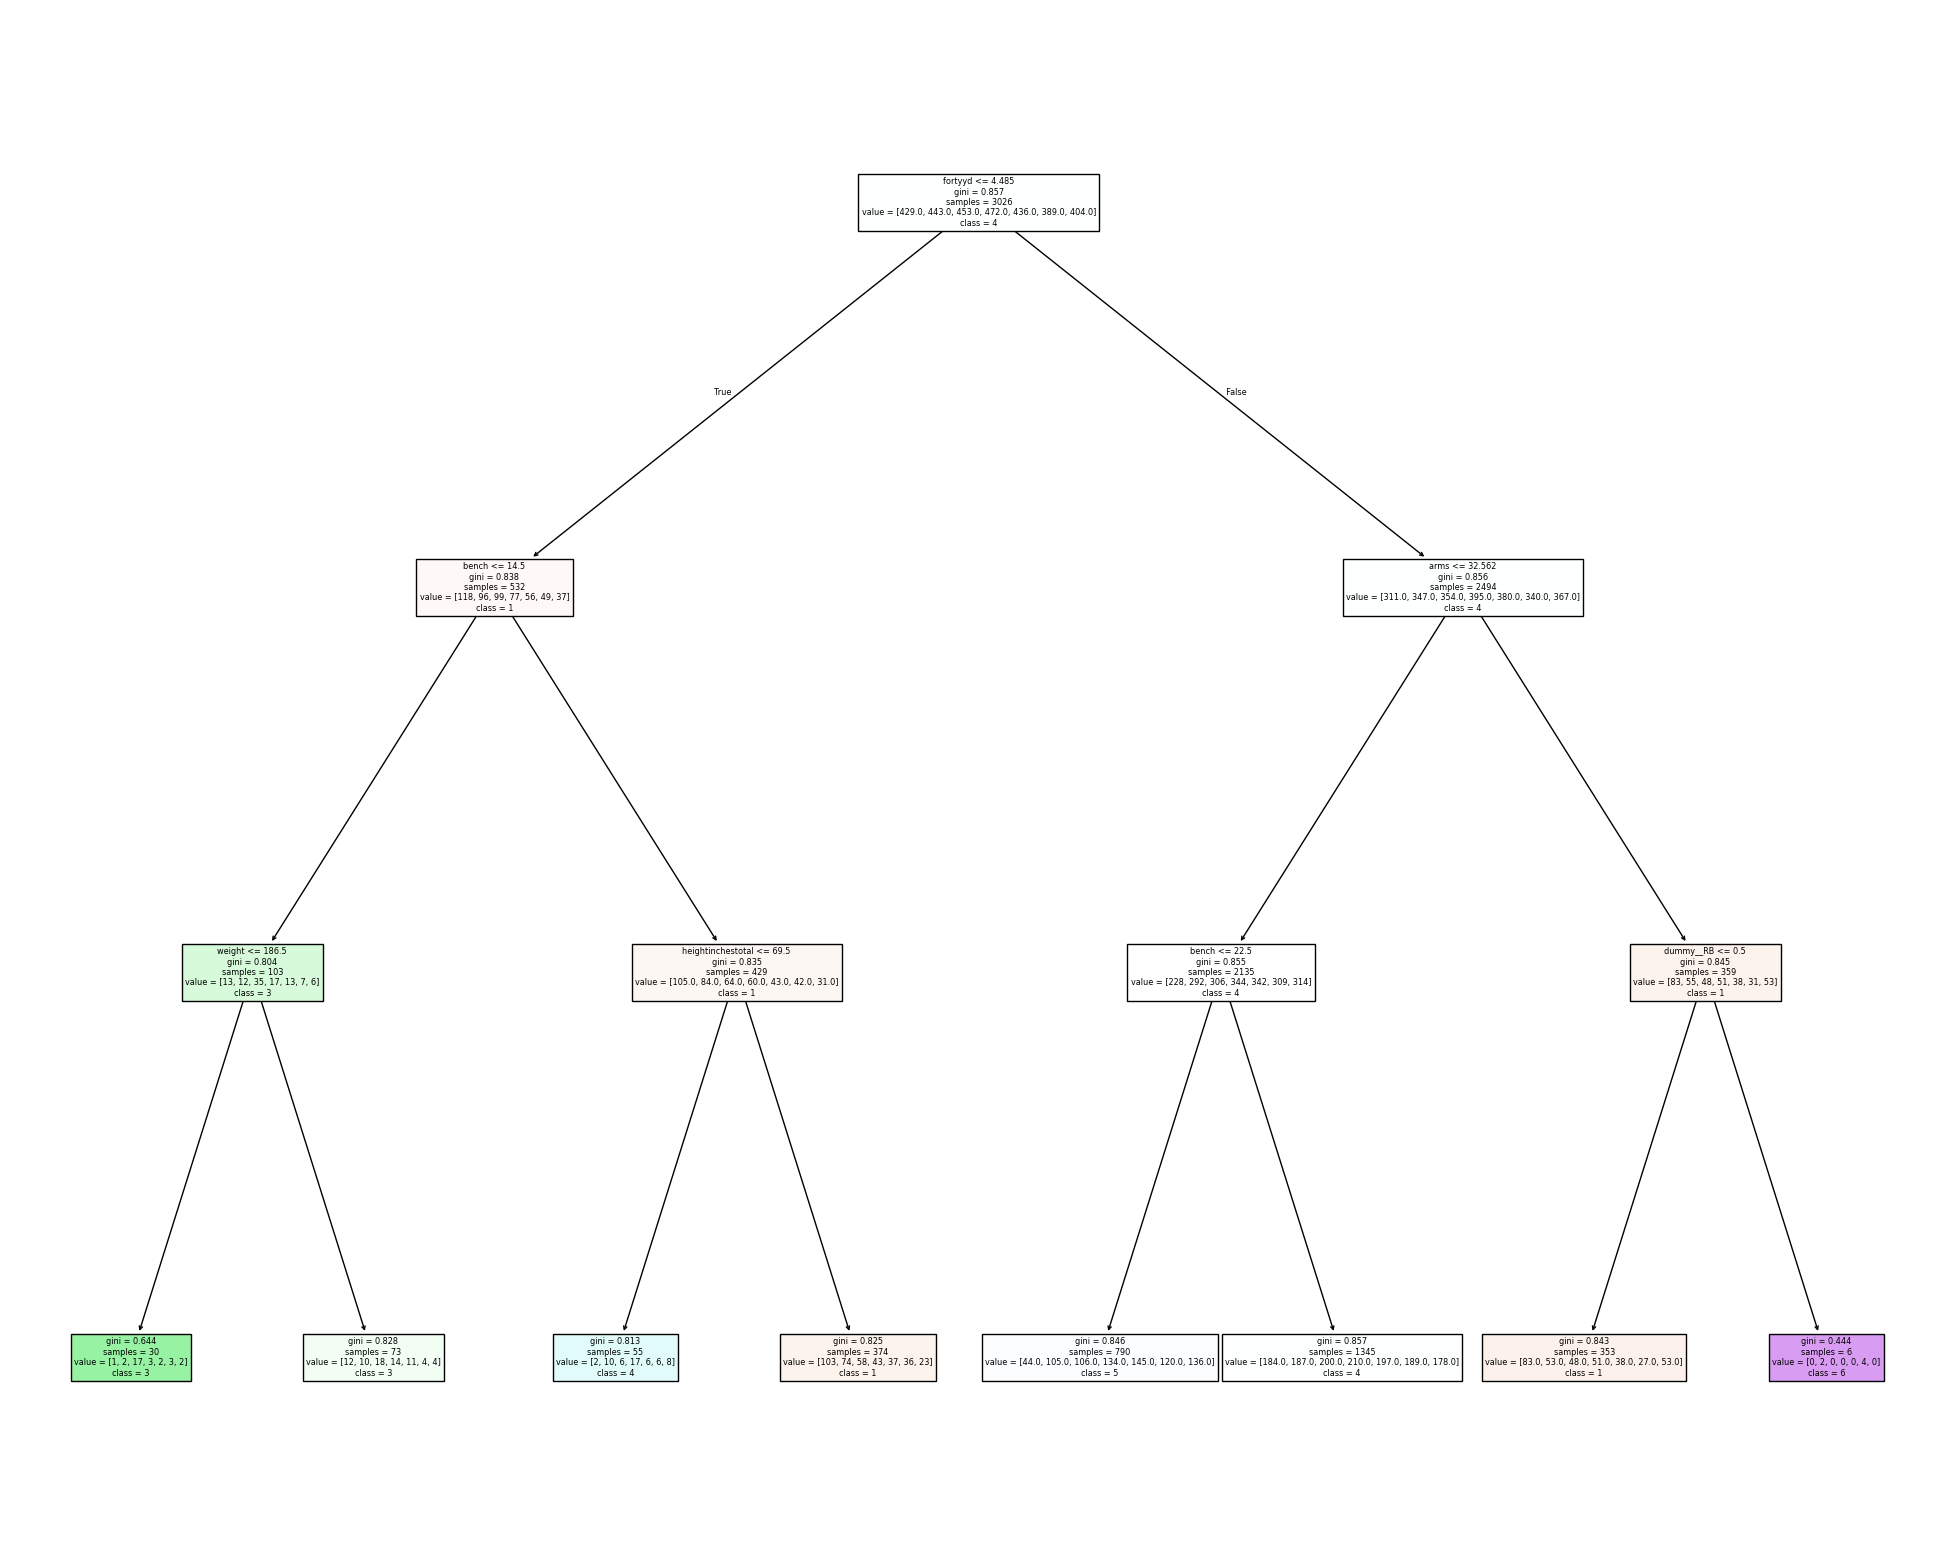

In [ ]:
# Let's try a decision tree, shallow tree first for example

tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X,y)
plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model, 
                   feature_names=X.columns,  
                   class_names=tree_model.classes_.astype(str),
                   filled=True)


In [ ]:
# Finding optimal tree depth - it turns out to be 26. However, this looks like it overfit and also very inaccurate

tree_X_train, tree_X_test, tree_y_train, tree_y_test = train_test_split(X, y,
                                            train_size=0.9,
                                            random_state=42) 

tree_data = []

depth = 1
while depth <50:
    lg_model = DecisionTreeClassifier(random_state=42,max_depth=depth)
    lg_model.fit(tree_X_train,tree_y_train)
    tree_y_pred = lg_model.predict(tree_X_train)
    tree_y_pred_test = lg_model.predict(tree_X_test)
    txt = ' '
    if metrics.accuracy_score(tree_y_train, tree_y_pred)<metrics.accuracy_score(tree_y_test, tree_y_pred_test):
        txt = '!' 
    tree_data.append([depth,metrics.accuracy_score(tree_y_train, tree_y_pred),metrics.accuracy_score(tree_y_test, tree_y_pred_test),lg_model.tree_.node_count,txt])
    depth+=1

tree_df = pd.DataFrame(tree_data,columns=['depth','train_accuracy','test_accuracy','node_count','error'])
tree_df.sort_values('test_accuracy',ascending=False).head(10)

,depth,train_accuracy,test_accuracy,node_count,error
27,28,0.950422,0.184818,2843,
7,8,0.328314,0.168317,273,
4,5,0.227323,0.165017,59,
5,6,0.254131,0.165017,103,
25,26,0.949688,0.161716,2829,
19,20,0.858979,0.161716,2357,
24,25,0.932795,0.158416,2713,
6,7,0.283511,0.158416,171,
14,15,0.701799,0.158416,1627,
22,23,0.907455,0.155116,2617,


In [ ]:
# Important features in the tree include forty yard dash, height, and arm length.

lg_model = DecisionTreeClassifier(random_state=42,max_depth=28)
lg_model.fit(tree_X_train,tree_y_train)
text_representation = tree.export_text(lg_model)
print(tree_X_train.columns)
print('\n')
print(text_representation)

Index(['heightinchestotal', 'weight', 'arms', 'hands', 'fortyyd', 'twentyss',
       'threecone', 'vertical', 'broad', 'bench', 'dummy__C', 'dummy__CB',
       'dummy__DE', 'dummy__DT', 'dummy__FB', 'dummy__FS', 'dummy__ILB',
       'dummy__NT', 'dummy__OC', 'dummy__OG', 'dummy__OLB', 'dummy__OT',
       'dummy__P', 'dummy__QB', 'dummy__RB', 'dummy__SS', 'dummy__TE',
       'dummy__WR'],
      dtype='object')


|--- feature_4 <= 4.48
|   |--- feature_8 <= 124.50
|   |   |--- feature_2 <= 33.19
|   |   |   |--- feature_9 <= 13.50
|   |   |   |   |--- feature_1 <= 187.00
|   |   |   |   |   |--- feature_8 <= 116.50
|   |   |   |   |   |   |--- feature_3 <= 8.12
|   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |--- feature_3 >  8.12
|   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |--- feature_8 >  116.50
|   |   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_1 >  187.00
|   |   |   |   |   |--- feature_5 <= 4.10
|   |   |   |   |   |   |--- featu

In [ ]:
# I'm going to try bagging this to see if I can get any better results.
# The results are slightly better, but there is still the overfitting to consider.

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, n_jobs=-1, random_state=42)

bag_clf.fit(tree_X_train, tree_y_train)
tree_y_pred = bag_clf.predict(tree_X_test)
metrics.accuracy_score(tree_y_test, tree_y_pred)

0.17491749174917492

In [ ]:
# Trying random forest classification, not as good as bagging normal decision tree.

rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(tree_X_train, tree_y_train)
tree_y_pred = rnd_clf.predict(tree_X_test)
metrics.accuracy_score(tree_y_test, tree_y_pred)

0.1716171617161716

In [ ]:
best_features = []

for score, name in zip(rnd_clf.feature_importances_, tree_X_train.columns):
    best_features.append([round(score,2), name])

best_features_df = pd.DataFrame(best_features,columns=['importance','name'])
best_features_df.sort_values('importance',ascending=False).head(5)

,importance,name
1,0.14,weight
4,0.14,fortyyd
5,0.12,twentyss
8,0.11,broad
7,0.11,vertical


In [ ]:
# Finally, I will combine all of these classifiers with voting classification.

v_X_train, v_X_test, v_y_train, v_y_test = train_test_split(X, y,
                                            train_size=0.9,
                                            random_state=42)

v_pipe = make_pipeline(SimpleImputer(strategy='median'),StandardScaler())
v_X_train = v_pipe.fit_transform(v_X_train)
v_X_test = v_pipe.fit_transform(v_X_test)

voting_clf = VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                                          ('rf', RandomForestClassifier(random_state=42)),
                                          ('svc', SVC(random_state=42))])
voting_clf.voting = 'soft'
voting_clf.named_estimators['svc'].probability = True

voting_clf.fit(v_X_train, v_y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [ ]:
for name, clf in voting_clf.named_estimators_.items():
    print(name, ': ', clf.score(v_X_test, v_y_test))
voting_clf.score(v_X_test, v_y_test)

lr :  0.14521452145214522
rf :  0.13861386138613863
svc :  0.12211221122112212


0.19801980198019803